# Physics 404/604

## Computational Physics (Spring 2018)

## BPB-250, Mon./Wed. 2:30-3:45 pm

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |

# Partial Differential Equations (PDEs)

\begin{equation}
A\frac{\partial^2 U(x,y)}{\partial x^2}+2B\frac{\partial^2 U(x,y)}{\partial x\partial y}+C\frac{\partial^2 U(x,y)}{\partial y^2}+D\frac{\partial U(x,y)}{\partial x}+E\frac{\partial U(x,y)}{\partial y}=F
\end{equation}

|*     Elliptic     * | *      Parabolic   * | *   Hyperbolic   * |
|----|----|----| 
|$d=AC-B^2>0$|$d=AC-B^2=0$|$d=AC-B^2<0$|
|$\nabla^2 U(x) = -4\pi\rho(x)$|$\nabla^2 U(\mathbf{x},t) =a \partial U/\partial t$|$\nabla^2 U(\mathbf{x},t)=c^{-2}\partial^2 U/\partial t^2\mbox{}$  |
| Poisson's | Heat | Wave|

Elliptic equation: second-order derivatives of all the variables, but having the same sign when placed on the same side  
Parabolic equation: a first-order derivative in one variable and a second-order derivative in the other  
Hyperbolic equation: equation: second-order derivatives of all the variables, but having the opposite signs when placed on the same side  

To uniquely determine the solution, needs special boundary/initial condition.

## Elliptic Equation:
Left: The shaded region of space within a square in which we determine the electric potential by solving Laplace's equation. There is a wire at the top kept at a constant 100 V and a grounded wire (dashed) at the sides and bottom. Right: The computed electric potential as a function of x and y. The projections onto the shaded xy plane are equipotential (contour) lines. (Landau Textbook)

![From textbook](http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/Figs/Fig19_1.png)

### Jacobi method
\begin{equation}
du_{i,j}=\frac{1}{4}(V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1})-V_{i,j}
\end{equation}
\begin{equation}
V^*_{i,j}=V_{i,j}+du_{i,j}
\end{equation}

Initializing


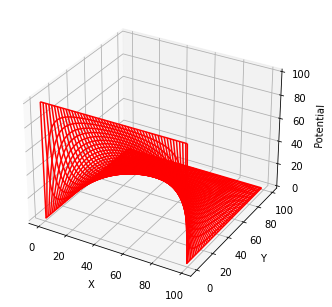

In [4]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
Nmax = 100; Niter = 7000
V = zeros((Nmax, Nmax), float)  # potential at i and j, V(i,j), 100 x and 100 y, x0----x100, y0---y100
du = zeros((Nmax, Nmax), float) # change of potential at i and j for each step

for k in range(0, Nmax):  V[k,0] = 100.0            # Line at 100V
    
for iter in range(Niter):                                  
    #if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du[i,j] = (1/4)*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j] # Please finish this line for Jacobi method
            if(maxerr<abs(du[i,j])):
                maxerr=abs(du[i,j])
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1):    
            V[i,j] = V[i,j] + du[i,j]               # get the new V[i,j]
    #print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                      # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                    # Create figure
ax = Axes3D(fig)                                    # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')             # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                            # Show fig

### Gauss-Siedel

\begin{equation}
du=\frac{1}{4}(V_{i+1,j}+V^*_{i-1,j}+V_{i,j+1}+V^*_{i,j-1})-V_{i,j}
\end{equation}
\begin{equation}
V^*_{i,j}=V_{i,j}+du
\end{equation}
Implementing this is actually simple, just update every $V_{i,j}$ after it has been modified. You don't need to store $du_{i,j}$. You only need $du$


Initializing


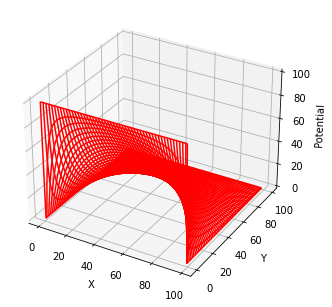

In [5]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
Nmax = 100; Niter = 5000; V = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    #if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1./4.*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j] #
            if(maxerr<abs(du)): # how much correction we have in this step
                maxerr=abs(du)  #
            V[i,j]= V[i,j]+du   # please finish this line for Gauss-Siedel method
    #print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

### SOR

The same as Gauss-Seidal, except with a $\omega$ parameter for correction
\begin{equation}
du_{i,j}=\frac{1}{4}(V_{i+1,j}+V^*_{i-1,j}+V_{i,j+1}+V^*_{i,j-1})-V_{i,j}
\end{equation}
\begin{equation}
V^*_{i,j}=V_{i,j}+\Omega du_{i,j}
\end{equation}
$\Omega$ is between 1 and 2

Initializing


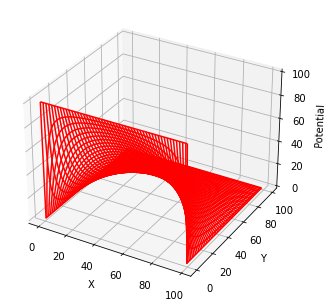

In [7]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 3000; V = zeros((Nmax, Nmax), float)   

for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    #if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1/4*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j]=V[i,j]+omega*du#### Please Finish this line on updating V[i,j]
    #print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

## 9 point stencil with SOR (Optional)

\begin{equation}
\vert \nabla^2 U\vert_{9}=\frac{1}{6h^2}\left(U_{i-1,j+1}+4U_{i,j+1}+U_{i+1,j+1}+4U_{i-1,j}-20U_{i,j}+4U_{i+1,j}+U_{i-1,j-1}+4U_{i,j-1}+U_{i+1,j-1}\right)
\end{equation}

Initializing
Working hard, wait for the figure while I count to 60


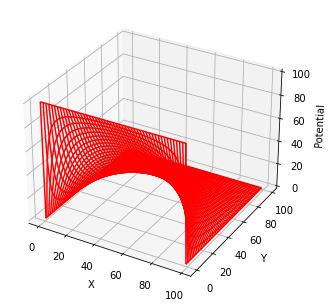

In [2]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit
# 9 point stencil


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 100; Niter = 2000; V = zeros((Nmax, Nmax), float)   

print ("Working hard, wait for the figure while I count to 60")
for k in range(0, Nmax-1):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    #if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1./20.*(V[i-1,j+1]+V[i+1,j+1]+V[i-1,j-1]+V[i+1,j-1]+4.*(V[i,j+1]+V[i,j-1]+V[i-1,j]+V[i+1,j]))-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
    #print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig

## Multigrid method (Optional)

Initializing
Working hard, wait for the figure while I count to 60
iter  0
size maxerr  129 19.413860073917327 48.15062017672565
before size 129 48.15062017672565 0.0
size maxerr  65 1.6941983407022931 0.8737302322708634
before size 65 0.8737302322708634 -0.07359572511287338
size maxerr  33 0.6287523805458939 2.2864825479430912
before size 33 2.2864825479430912 -0.05055967995015555
size maxerr  17 1.2586781885663403 4.475021691652504
before size 17 4.475021691652504 -0.026487651402959722
size maxerr  9 1.5139443455260353 5.892290792028862
before size 9 5.892290792028862 -0.008585125785531802
size maxerr  5 1.7501700030852068 3.4111706586627775
before size 5 3.4111706586627775 -0.000630871076925986
size maxerr  9 1.280510575950346 4.2807227202144595
after size  9 4.2807227202144595 -0.008585125785531802
size maxerr  17 0.8166015708946143 4.710615334174122
after size  17 4.710615334174122 -0.026487651402959722
size maxerr  33 0.5869975086865313 3.14398051941158
after size  33 3.143980519

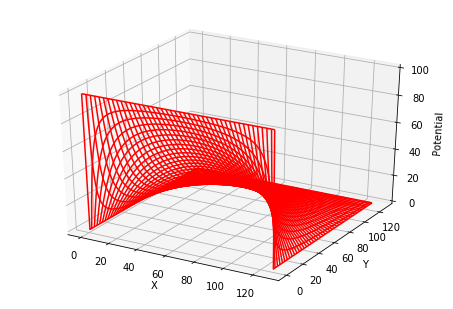

In [5]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
omega=1.9
   
def GSsolve(Arrin, f, size, h):
    Arr=Arrin
    N1=5
    Res=zeros((size,size), float)
    for iter in range(N1):  
        maxerr=0.
        for i in range(1, size-1):                                                
            for j in range(1,size-1):
                du = 0.25*(Arr[i+1,j]+Arr[i-1,j]+Arr[i,j+1]+Arr[i,j-1]-f[i,j]*h*h)-Arr[i,j]
                if(maxerr<abs(du)):
                    maxerr=abs(du)
                Arr[i,j] = Arr[i,j] + omega*du
    for i in range(1, size-1):                                                
        for j in range(1,size-1):
            Res[i,j]=f[i,j]-0.25*(Arr[i+1,j]+Arr[i-1,j]+Arr[i,j+1]+Arr[i,j-1]-4.*Arr[i,j])/h/h
    print('size maxerr ',size,maxerr,Arr[2,2])
    return (Res,Arr)

def Restrict(Arr, size):
    assert(size%2==1)
    sizeC = int((size-1)/2 + 1)
    Arrc=zeros((sizeC,sizeC),float)
    for i in range(0, sizeC): 
        Arrc[i,0]=Arr[i*2,0]
        Arrc[i,-1]=Arr[i*2,-1]
    for j in range(0, sizeC): 
        Arrc[0,j]=Arr[0,j*2]
        Arrc[-1,j]=Arr[-1,j*2]
    for i in range(1, sizeC-1): 
        for j in range(1, sizeC-1):
            Arrc[i,j]=0.25*(Arr[2*i,2*j]+0.5*(Arr[2*i-1,2*j]+Arr[2*i+1,2*j]+Arr[2*i,2*j-1]+Arr[2*i,2*j+1])+0.25*(Arr[2*i-1,2*j-1]+Arr[2*i-1,2*j+1]+Arr[2*i+1,2*j-1]+Arr[2*i+1,2*j+1]))
    return Arrc

def Prolong(Arr, size):
    sizeF = size*2-1
    Arrf=zeros((sizeF,sizeF),float)
    for i in range(0, size): 
        for j in range(0, size):
            Arrf[2*i,2*j]=Arr[i,j]
            if(i<size-1):
                Arrf[2*i+1,2*j]=0.5*(Arr[i,j]+Arr[i+1,j])
            if(j<size-1):
                Arrf[2*i,2*j+1]=0.5*(Arr[i,j]+Arr[i,j+1])
            if(i<size-1 and j<size-1):
                Arrf[2*i+1,2*j+1]=0.25*(Arr[i,j]+Arr[i+1,j]+Arr[i,j+1]+Arr[i+1,j+1])
    return Arrf

def vcycle(Arr, f, size, h):
    (Res,Arr)=GSsolve(Arr, f, size, h)
    print('before size', size, Arr[2,2],f[2,2])
    if(size < 8):
        return Arr
    Res2h=Restrict(Res, size)
    N2h=int((size-1)/2+1)    
    e2h=zeros((N2h,N2h),float)
    e2h=vcycle(e2h, Res2h, N2h, 2.*h)
    e2=Prolong(e2h, N2h)
    Arr=Arr+e2
    (Res,Arr)=GSsolve(Arr, f, size, h)
    print('after size ',size,Arr[2,2],f[2,2])
    return Arr

print("Initializing")
Nmax = 129; V = zeros((Nmax, Nmax), float)   
f=zeros((Nmax,Nmax),float)

print ("Working hard, wait for the figure while I count to 60")
for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
 
h=1
itermax=30
for iter in range(itermax):
    print('iter ',iter)
    V=vcycle(V,f,Nmax, h)
    print('V f ',V[2,2],f[2,2])
    
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()   # Show fig


In [6]:
Vhighres = V

Initializing
Working hard, wait for the figure while I count to 60
0


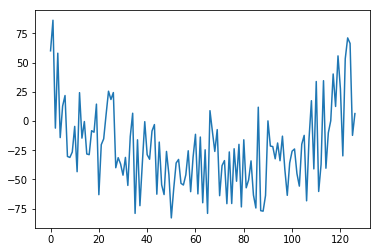

79.92465632292138
80.70612243078666
76.46615378951837
60.57445758665094
50.35405394946497
45.64179766892905
39.635318920522735
41.99358020740424
30.5973429798829
32.292499301230436
29.417557934340294
24.91957517561616
27.472486855297007
22.282107463257212
15.792628796496153
12.59465773323712
11.495395407622677
10.155948337668434
9.085722264794143
8.917777418381718
8.382857637362946
6.83264544377495
5.497168485945238
5.778192215047568
4.672816930322043
3.7801185918466578
3.7839630883873703
3.374856593639546
3.668504180090764
3.226984648883189
4.0595067646379235
3.6296154562827425
2.2247029776776444
1.541064655006224
1.2480872201891522
1.1319680613092586
1.1936688314084716
1.036936233577478
0.9147277858139686
0.7453933891896742
0.7050598625622513
0.6183910731627762
0.5771304427778219
0.5310710521253057
0.49473821746085633
0.4665791609413219
0.4456107006169532
0.42432494867877324
0.40189005539853184
0.3858923984238629
0.36797641686261073
0.35117355300425857
0.3394647263963364
0.3247662665

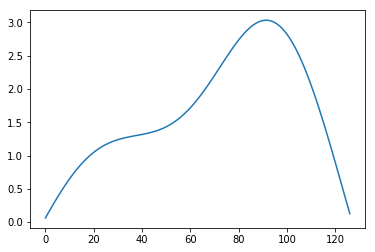

0.1280481933929778
0.12658412244815764
0.12514590485464794
0.12374521953012163
0.12237766529688088
0.12102473010360626
0.11972375349695596
0.11843270860506294
0.11715248904415887
0.1159076835180386
0.11468790919249727
0.11350433054529674
0.11234014128324077
0.11118462845093546
0.11006830236332377
0.1089654429300353
0.1078704152120693
0.10679230021800379
0.10574581016302176
0.10472117368185252
0.1037189931277922
0.10272390304647416
0.10174609048340244
0.10079258091835186
0.09984560762529782
0.09890530985758517
0.09798759179653871
0.0970852286607311
0.09621083534412378
0.09534456024487525
0.09448399525329876
0.09364098759267847
0.0928134342663327
0.09199122825974371
0.09117455634451233
0.09037508540432526
0.08958859322727619
0.08882667573912073
0.08807001775664958
0.08731808835574384
0.08657452482076877
0.08584906827204009
0.08512808815537909
0.08441171185841512
0.08370004673655984
0.0830084963548785
0.08233168008583647
0.08166472176285566
0.08100174526469317
0.08034285362263915
0.079689

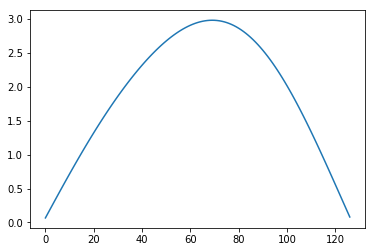

0.054940461224742165
0.054558181904916125
0.054181079869760396
0.05380997191851833
0.05344411251545367
0.05308053161211035
0.05271923659272204
0.052360233706288284
0.052003528117928965
0.051649123957801635
0.05129702436855155
0.05094723155039205
0.05060210907960894
0.050262507719555316
0.049926665638995615
0.049594504900547065
0.0492644349989142
0.048936458193157506
0.04861057595839213
0.04828678902098815
0.04796509739231425
0.047645500401443996
0.04732799672624921
0.04701745497125742
0.046708900764279804
0.04640231793316829
0.04609770528664825
0.04579735688202291
0.04549910817577185
0.04520276121258959
0.0449083140531954
0.04461576425988767
0.0443251089193879
0.0440376930327524
0.04375502633799755
0.04347414517573256
0.043195046942368975
0.04291772861788701
0.0426421867848461
0.04236841764687327
0.042096417046227685
0.041827220807974186
0.041560651582774
0.041295790293919055
0.04103397495813965
0.0407761682521155
0.04051997302595467
0.04026538556850312
0.04001240187470145
0.0397610176

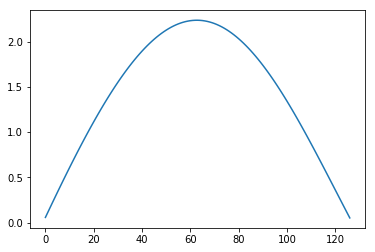

0.029186323462639052
0.029015013326198158
0.028846467618073746
0.028678969256922926
0.02851246289903031
0.028346943755646947
0.028182798580804302
0.028019979297585706
0.02785811721637188
0.02769720770603712
0.02753724610828101
0.02737822773960019
0.027220147893565638
0.027063001842659418
0.026906784840335263
0.02675214298582418
0.02659926057581785
0.026447262801820415
0.026296145359463452
0.02614590392584759
0.02599653416108083
0.025848031710065555
0.02570039220391962
0.025553611261646125
0.025407684491472793
0.02526260749231568
0.025118375855125663
0.024974985164192276
0.02483243099841559
0.024691926779894402
0.024552273378599665
0.024413418363881334
0.02427535771145628
0.024138087390735308
0.0240016033659316
0.023865901597201145
0.023731220074839854
0.023597563958990264
0.023464667991035526
0.0233325282899699
0.023201140972727075
0.023070502155110972
0.02294060795262709
0.022811454481292515
0.022683753261777184
0.022557101341831753
0.022431158057045764
0.0223059198624469
0.0221813832

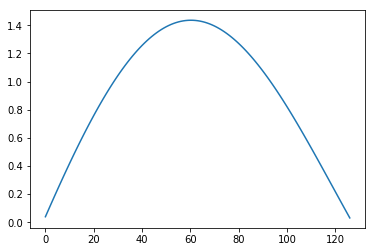

0.016630199111048682
0.01653936272850487
0.01644901682924882
0.016359158936694485
0.01626978658165612
0.016180897302465524
0.016092488645142566
0.016004558163469795
0.015917103419155865
0.01583012198202738
0.015743611429911653
0.015657569348967115
0.015571993333686862
0.015486880987005236
0.015402229920404409
0.015318037753935698
0.01523430211644694
0.015151020645472357
0.015068190987470587
0.014985810797792709
0.01490416535905581
0.014823056771920307
0.014742383275777371
0.014662142677387635
0.014582332791096775
0.01450295143875735
0.01442401433810403
0.014345634449217215
0.014267673672883063
0.014190129907682092
0.014113001059545383
0.014036285041605367
0.013959979774526232
0.013884083186308516
0.01380859321248451
0.01373350779614313
0.013658824887976095
0.013584542446320569
0.01351065843718402
0.013437170834350809
0.013364077619339554
0.013291376781477737
0.013219066317947892
0.01314714423384089
0.013075608542070682
0.013004457263598113
0.012933688427228418
0.01286330006984926
0.012

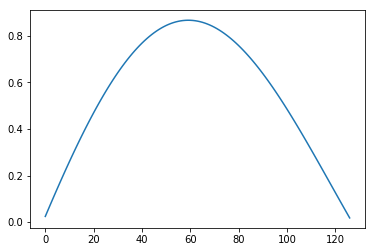

0.009639803814941672
0.009587464075565322
0.009535404663754576
0.009483624137242685
0.009432121060331866
0.009380894003605533
0.00932994154421607
0.00927926226556508
0.009228854757513005
0.009178718435180144
0.00912889918998161
0.00907934657653442
0.009030059224642173
0.008981035770339929
0.008932274855695255
0.008883775128911253
0.008835535244230641
0.00878755386200325
0.008739829648629183
0.008692361276590788
0.008645147424328314
0.008598186776389127
0.008551478023285597
0.008505019861551943
0.00845881099366963
0.008412850128152627
0.00836713597941241
0.008321667267829014
0.008276442719719057
0.008231461067289558
0.008186744060051154
0.008142329706245732
0.008098152827596294
0.00805421220530178
0.00801050662607139
0.007967034882000235
0.007923795770693687
0.007880788095203428
0.007838010663906658
0.007795462290697941
0.007753141794808016
0.007711048000878407
0.007669179738908127
0.007627535844250133
0.007586115157639739
0.007544916525105805
0.007503938798013365
0.00746318083303521
0.

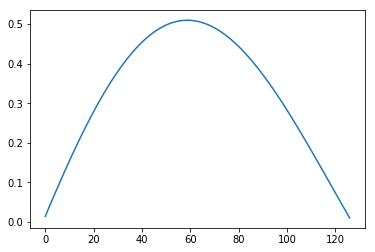

0.005589378455798766
0.005558930820896535
0.0055286477790410515
0.0054985284584638805
0.005468571991713134
0.005438777515767157
0.005409144171821367
0.005379671105430361
0.005350357466426203
0.005321202408907766
0.005292219298919321
0.005263406873211807
0.005234749973766384
0.005206247779934614
0.005177899475178549
0.005149704246925069
0.005121661286722201
0.00509376979004017
0.005066028956392188
0.005038437989281164
0.005010996096086018
0.004983702488274844
0.004956556381110033
0.0049295569938330175
0.004902703549600318
0.004875995275398282
0.004849431402096371
0.004823011164450719
0.004796733801008202
0.004770598554181049
0.004744604670094077
0.004718751398783638
0.004693037993938276
0.004667463713087017
0.0046420278174821306
0.004616729572024525
0.0045915682454200635
0.004566543110037458
0.004541653441879845
0.004516898520680712
0.004492277629744024
0.004467790056033039
0.004443435090159653
0.0044192120262955825
0.004395120162179467
0.0043711587991595025
0.004347327242090415
0.00432

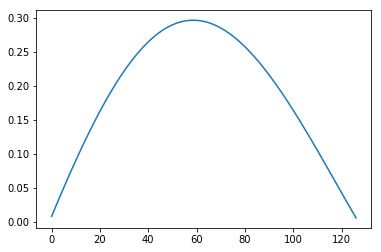

0.003235248805651736
0.003217583534922852
0.0032000143449799623
0.003182540718494664
0.003165162140835065
0.0031478781001084144
0.0031306880870687337
0.003113591595152343
0.003096588120456545
0.0030796771617396246
0.003062858220371112
0.0030461308003530974
0.0030294944082776
0.0030129485533763045
0.002996492747406876
0.0029801265047311176
0.002963849342247471
0.0029476607794372
0.0029315603382684685
0.0029155475432460776
0.002899621921386597
0.0028837830021934963
0.0028680303176678024
0.0028523634022512567
0.0028367817928689476
0.0028212850289008884
0.0028058726521074107
0.0027905442067108766
0.0027752992393850207
0.0027601372990773143
0.0027450579372612083
0.002730060707687443
0.0027151451665119453
0.0027003108722212232
0.00268555738563947
0.0026708842699356694
0.0026562910905774118
0.0026417774153451035
0.0026273428142964406
0.0026129868597948303
0.0025987091264276785
0.002584509191105866
0.0025703866329109815
0.0025563410332090086
0.0025423719755934826
0.0025284790458179884
0.002514

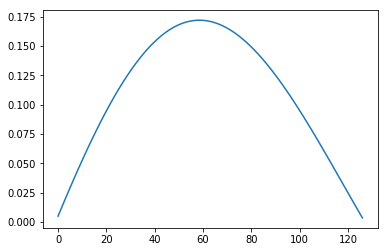

0.0018703696846458229
0.0018601422401509637
0.0018499706281964734
0.0018398545453095494
0.0018297936896125577
0.0018197877608159274
0.0018098364603211792
0.0017999394911001332
0.0017900965576771455
0.0017803073662605584
0.0017705716245579595
0.0017608890418898682
0.0017512593291435508
0.0017416821987197295
0.0017321573646569277
0.001722684542404096
0.0017132634490799603
0.0017038938032172268
0.0016945753249402173
0.0016853077358476298
0.0016760907590409602
0.0016669241190960804
0.001657807542123635
0.001648740755673117
0.001639723488761291
0.0016307554718828499
0.0016218364369748883
0.0016129661174346666
0.0016041442480769774
0.0015953705651625683
0.0015866448063803773
0.0015779667108120066
0.001569336018977907
0.0015607524727769828
0.0015522158154830379
0.001543725791815831
0.0015352821478238354
0.0015268846309375306
0.0015185329899658484
0.0015102269750641995
0.0015019663377167092
0.0014937508308037195
0.0014855802084916547
0.0014774542262934176
0.0014693726410435204
0.00146133521088

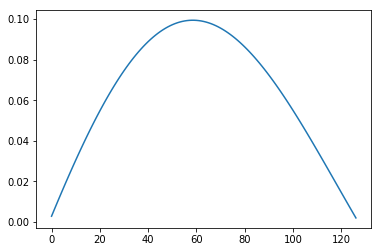

0.0010807231866429845
0.0010748100055160137
0.001068929155547238
0.0010630804602911326
0.001057263744250747
0.001051478956249241
0.0010457258738547637
0.0010400042460467773
0.0010343139011226299
0.0010286546684170617
0.001023026378096148
0.0010174288613029603
0.0010118619500758541
0.0010063254773484687
0.0010008192770314395
0.000995343183856079


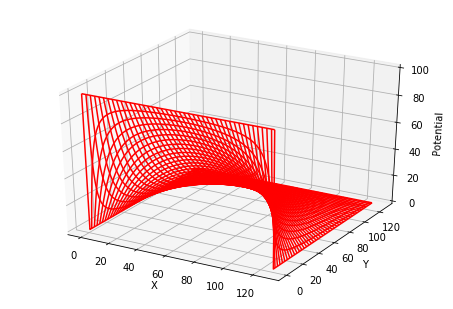

In [7]:
## Test iterative method error
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""
   
# LaplaceLine.py:  Solve Laplace's eqtn, 3D matplot, close shell to quit


import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
Nmax = 129; Niter = 5000; V = random.rand(Nmax,Nmax)*100.
V[0,:]=0.0
V[-1,:]=0.0
V[:,-1]=0.0

print ("Working hard, wait for the figure while I count to 60")
for k in range(0, Nmax):  V[k,0] = 100.0              # Line at 100V
    
for iter in range(Niter):                                  
    if iter%100 == 0: 
        print(iter)
        p.plot((V[1:(Nmax-1),10]-Vhighres[1:(Nmax-1),10]))
        p.show()
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])-V[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            V[i,j] = V[i,j] + omega*du 
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig


### Multigrid to solve general matrix problem (Optional)

In [41]:
#! /usr/bin/env python
#
def vcycle ( A, f ):

#*****************************************************************************80
#
## VCYCLE performs one v-cycle on the matrix A.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    02 October 2016
#
#  Author:
#
#    Mike Sussman
#
#  Parameters:
#
#    Input, A(*,*), the matrix.
#
#    Input, f(*), the right hand side.
#
#    Output, v(*), the solution of A*v=f.
#
  import numpy as np
  import scipy.linalg as la

  sizeF = np.size ( A, axis = 0 )
#
#  directSize=size for direct inversion
#
  if sizeF < 15:
    v = la.solve(A,f)
    return v
#
#  N1=number of Gauss-Seidel iterations before coarsening
#
  N1 = 5;
  v = np.zeros(sizeF);
  for numGS in range(N1):
    for k in range(sizeF):
      v[k] = (f[k] - np.dot(A[k,0:k], v[0:k]) \
                   -np.dot(A[k,k+1:], v[k+1:]) ) / A[k,k];
# 
#  construct interpolation operator from next coarser to this mesh
#  next coarser has ((n-1)/2 + 1 ) points
#
  assert(sizeF%2 ==1)
  sizeC =  int((sizeF-1)/2 +1)
  P = np.zeros((sizeF,sizeC));
#
#  Copy these points.
#
  for k in range(sizeC):
    P[2*k,k] = 1;
#
#  Average these points:
#
  for k in range(sizeC-1):
    P[2*k+1,k] = .5;
    P[2*k+1,k+1] = .5;
#
#  compute residual
#
  residual = f - np.dot(A,v)
#
#  project residual onto coarser mesh
#
  residC = np.dot(P.transpose(),residual)
#
#  Find coarser matrix  (sizeC X sizeC)
#
  AC = np.dot(P.transpose(),np.dot(A,P))

  vC = vcycle(AC,residC);
#
# extend to this mesh
#
  v = np.dot(P,vC)
#
#  N2=number of Gauss-Seidel iterations after coarsening
#
  N2 = 5;
  for numGS in range(N2):
    for k in range(sizeF):
      v[k] = (f[k] - np.dot(A[k,0:k], v[0:k]) \
                   - np.dot(A[k,k+1:], v[k+1:]) ) / A[k,k];
  return v

def vcycle_test ( ):

#*****************************************************************************80
#
## VCYCLE_TEST tests VCYCLE.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    02 October 2016
#
#  Author:
#
#    Mike Sussman
#
  import numpy as np
  import platform
  import scipy.linalg as la

  print ( '' )
  print ( 'VCYCLE_TEST:' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  VCYCLE applies one V-cycle to a matrix.' )

  N = 2**11+1
  x = np.linspace(0,1,N);
  h = x[1]-x[0]
#
#  A is the [-1,2,-1]/h^2 tridiagonal matrix
#
  A = np.diag ( 2.0 * np.ones(N)       ) \
    - np.diag (       np.ones(N-1),  1 ) \
    - np.diag (       np.ones(N-1), -1 )

  A = A / h**2
#
#  The right hand side is a vector of 1's.
#
  f = np.ones ( N, dtype = float )
#
#  UDIRECT is the exact solution, from Gauss elimination.
#
  udirect = la.solve ( A, f )

  u = np.zeros(N) # initial guess

  for iters in range ( 100 ):
    r = f - np.dot(A,u)
    if la.norm(r)/la.norm(f) < 1.e-10:
      print ( 'VCYLE_TEST: Tolerance achieved.' )
      break
    du = vcycle(A, r)
    u += du

    print(iters+1, la.norm(u-udirect)/la.norm(udirect) )
#
#  Terminate.
#
  print ( '' )
  print ( 'VCYCLE_TEST:' )
  print ( '  Normal end of execution.' )
  return

def timestamp ( ):

#*****************************************************************************80
#
## TIMESTAMP prints the date as a timestamp.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    06 April 2013
#
#  Author:
#
#    John Burkardt
#
#  Parameters:
#
#    None
#
  import time

  t = time.time ( )
  print ( time.ctime ( t ) )

  return None

def timestamp_test ( ):

#*****************************************************************************80
#
## TIMESTAMP_TEST tests TIMESTAMP.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license. 
#
#  Modified:
#
#    03 December 2014
#
#  Author:
#
#    John Burkardt
#
#  Parameters:
#
#    None
#
  import platform

  print ( '' )
  print ( 'TIMESTAMP_TEST:' )
  print ( '  Python version: %s' % ( platform.python_version ( ) ) )
  print ( '  TIMESTAMP prints a timestamp of the current date and time.' )
  print ( '' )

  timestamp ( )
#
#  Terminate.
#
  print ( '' )
  print ( 'TIMESTAMP_TEST:' )
  print ( '  Normal end of execution.' )
  return

if ( __name__ == '__main__' ):
  timestamp ( )
  vcycle_test ( )
  timestamp ( )



Tue Feb 20 01:03:50 2018

VCYCLE_TEST:
  Python version: 3.6.3
  VCYCLE applies one V-cycle to a matrix.
1 0.19375864852488722
2 0.037621444372180575
3 0.007417581554750196
4 0.0015529652098113646
5 0.0003782356430437982
6 0.00011261359989080355
7 3.808543660557306e-05
8 1.3466282332383022e-05
9 4.808142872510677e-06
10 1.7171804334682084e-06
11 6.123136015873487e-07
12 2.1800187332806868e-07
13 7.751897139475769e-08
14 2.7537655733554733e-08
15 9.77433969200904e-09
16 3.4668364809523252e-09
17 1.2288121568214472e-09
18 4.3527155306133844e-10
19 1.540968199286905e-10
20 5.454685046377418e-11
21 1.9325412336164292e-11
22 6.8692336709502036e-12
VCYLE_TEST: Tolerance achieved.

VCYCLE_TEST:
  Normal end of execution.
Tue Feb 20 01:03:57 2018
